# Nonlinear Optimization
This notebook provides a starter code for implementing nonlinear optimization methods for an objective function.

Please add this notebook to your Google Drive and complete all designated sections accordingly.

Creating a folder in your Google Drive to hold your Colaboratory assignments is recommended. Please include your .ipynb file with your assignment submission.

#Headers
Feel free to add any headers here.

In [1]:
from math import sqrt
from numpy import asarray
from numpy import arange
from numpy import meshgrid
from matplotlib import pyplot
from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits import mplot3d

import numpy as np

# Objective Function
Modify the "objective" function using the following equation.

$$f(x,y) = 4x^{2} + \dfrac{(y+3)^2}{15}$$

In [2]:
def objective(x, y):
	# <<TODO#1>> modify the objective function
	val = (4*x**2) + (((y+3*np.ones(y.shape))**2)/15)
	return val

# Gradient of objective function
Modify the "gradient" function accordingly. 

In [3]:
def gradient(x, y):
	# <<TODO#2>> modify the gradient function
	grad_x = 8*x
	grad_y = (2*(y+3*np.ones(y.shape)))/15
	return asarray([grad_x, grad_y])

#Part a: Plot the objective function
Use the following block to plot the objective function. Please do not modify it.

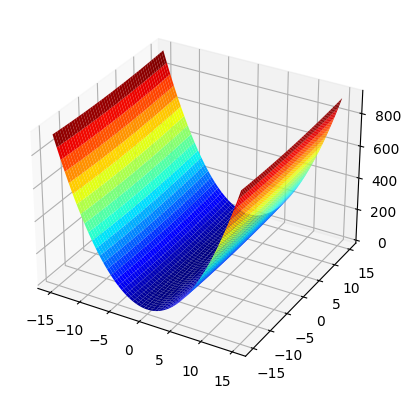

In [4]:
# define range for input
bounds = asarray([[-15.0, 15.0], [-15.0, 15.0]])
# sample input range uniformly at 0.1 increments
xaxis = arange(bounds[0,0], bounds[0,1], 0.1)
yaxis = arange(bounds[1,0], bounds[1,1], 0.1)
# create a mesh from the axis
x, y = meshgrid(xaxis, yaxis)
# Figure 1
# create a surface plot with the jet color scheme
figure_1 = pyplot.figure(1)
axis = figure_1.add_subplot(projection='3d') # changed gca to add_subplot #########################################
axis.plot_surface(x, y, objective(x, y), cmap='jet')

#Part b: Basic Gradient Descent


## b.1. Set Parameters
You may change the following parameters.

In [5]:
# define the total iterations
n_iter = 200
# steps size
gamma_t = 0.2

##b.2. Gradient Descent Function
Modify the following function to implement a basic gradient descent approach.

In [9]:
def gradient_descent(objective, derivative, bounds, n_iter, gamma_t):
	# track all solutions
	solutions = list()
	# Consider an initial point
	p = [-10, 10]
	solutions.append(p)
	score = objective(asarray(p[0]), asarray(p[1]))
	# run the gradient descent
	for t in range(n_iter):
		# report progress
		print('>%d f(%s) = %.5f' % (t, p, score))
		#<<TODO#3>> Add your code here
		grad_xy = derivative(asarray(p[0]), asarray(p[1]))
		x = p[0] - gamma_t*grad_xy[0]
		y = p[1] - gamma_t*grad_xy[1]
		solutions.append([x,y])
		p = asarray([x, y])
		score = objective(p[0], p[1])

	return solutions

##b.3. Solve the Problem using Gradient Descent
Use the following block to solve the problem. Please do not modify it.

In [10]:
# perform the gradient descent search
solutions = gradient_descent(objective, gradient, bounds, n_iter, gamma_t)
solutions = asarray(solutions)

>0 f([-10, 10]) = 411.26667
>1 f([6.         9.65333333]) = 154.67379
>2 f([-3.6         9.31591111]) = 61.95211
>3 f([2.16       8.98748681]) = 28.24239
>4 f([-1.296      8.6678205]) = 15.79433
>5 f([0.7776     8.35667862]) = 11.01692
>6 f([-0.46656     8.05383386]) = 9.01653
>7 f([0.279936   7.75906495]) = 8.03062
>8 f([-0.1679616   7.47215655]) = 7.42392
>9 f([0.10077696 7.19289905]) = 6.96697
>10 f([-0.06046618  6.92108841]) = 6.57649
>11 f([0.03627971 6.65652605]) = 6.22183
>12 f([-0.02176782  6.39901869]) = 5.89133
>13 f([0.01306069 6.14837819]) = 5.58020
>14 f([-0.00783642  5.90442144]) = 5.28616
>15 f([4.70184985e-03 5.66697020e+00]) = 5.00785
>16 f([-2.82110991e-03  5.43585099e+00]) = 4.74427
>17 f([1.69266594e-03 5.21089497e+00]) = 4.49460
>18 f([-1.01559957e-03  4.99193777e+00]) = 4.25808
>19 f([6.09359740e-04 4.77881943e+00]) = 4.03400
>20 f([-3.65615844e-04  4.57138424e+00]) = 3.82172
>21 f([2.19369506e-04 4.36948066e+00]) = 3.62062
>22 f([-1.31621704e-04  4.17296118e+00])

##b.4. Plot results for Basic Gradient Descent
Use the following block to plot the results. Please do not modify it.

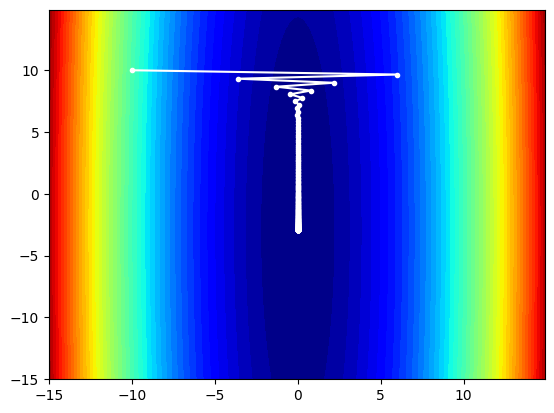

In [11]:
# Figure 2
# create a filled contour plot with 50 levels and jet color scheme
figure_2 = pyplot.figure(2)
pyplot.contourf(x, y, objective(x, y), levels=50, cmap='jet')
# plot the solution
pyplot.plot(solutions[:, 0], solutions[:, 1], '.-', color='w')
# show the plot
pyplot.show()

#Part c: Adaptive Gradient (AdaGrad)

##c.1. Set Parameters
You may change the following parameters.

In [38]:
# define the total iterations
n_iter = 250
# define the step size
gamma_t = 0.9

##c.2. AdaGrad Function
Modify the following function to implement the AdaGrad approach.

In [39]:
def adagrad(objective, derivative, bounds, n_iter, gamma_t):
	# track all solutions
	solutions = list()
	# Consider an initial point
	p = [-10, 10]
	solutions.append(p)
	score = objective(asarray(p[0]), asarray(p[1]))
	# initialize the preconditioner
	D_inv = np.zeros((len(p), len(p)))
	grad_xy = asarray([0]*len(p), dtype=np.float64)
	# run the AdaGrad
	for t in range(n_iter):
		# report progress
		print('>%d f(%s) = %.5f' % (t, p, score))
		#<<TODO#4>> Add your code here
		derivative_vals = derivative(asarray(solutions[-1][0]), asarray(solutions[-1][1]))
		grad_xy += derivative_vals**2
		for i in range(D_inv.shape[0]):
			D_inv[i,i] = (grad_xy[i]+1)**(-0.5) ############################### Adding 0.1 to the denominator so that D_inv is never infinity
		p = p - gamma_t*(D_inv @ derivative_vals.reshape(1, derivative_vals.size).T).squeeze()
		solutions.append(p.tolist())
		score = objective(p[0], p[1])
	return solutions

##c.3. Solve the Problem using AdaGrad
Use the following block to solve the problem. Please do not modify it. 

In [40]:
# perform the AdaGrad search
solutions = adagrad(objective, gradient, bounds, n_iter, gamma_t)
solutions = asarray(solutions)

>0 f([-10, 10]) = 411.26667
>1 f([-9.1000703   9.22043297]) = 341.20105
>2 f([-8.49435687  8.65216706]) = 297.66793
>3 f([-8.0155955  8.1879618]) = 265.34378
>4 f([-7.61183305  7.78854658]) = 239.51953
>5 f([-7.25908653  7.43445294]) = 218.03587
>6 f([-6.94397929  7.11437164]) = 199.69543
>7 f([-6.65815519  6.82104944]) = 183.75432
>8 f([-6.3959818   6.54950661]) = 169.71387
>9 f([-6.15344885  6.29614954]) = 157.22096
>10 f([-5.92758029  6.05828415]) = 146.01500
>11 f([-5.71609481  5.83382891]) = 135.89740
>12 f([-5.51719729  5.62113584]) = 126.71280
>13 f([-5.32944448  5.41887355]) = 118.33708
>14 f([-5.15165494  5.225948  ]) = 110.66928
>15 f([-4.98284653  5.041447  ]) = 103.62603
>16 f([-4.822192    4.86460046]) = 97.13761
>17 f([-4.66898642  4.69475103]) = 91.14502
>18 f([-4.52262304  4.53133225]) = 85.59787
>19 f([-4.38257487  4.37385174]) = 80.45276
>20 f([-4.2483805   4.22187827]) = 75.67198
>21 f([-4.11963309  4.07503154]) = 71.22258
>22 f([-3.99597148  3.93297411]) = 67.07556


## c.4. Plot results for AdaGrad
Use the following block to plot the results. Please do not modify it.

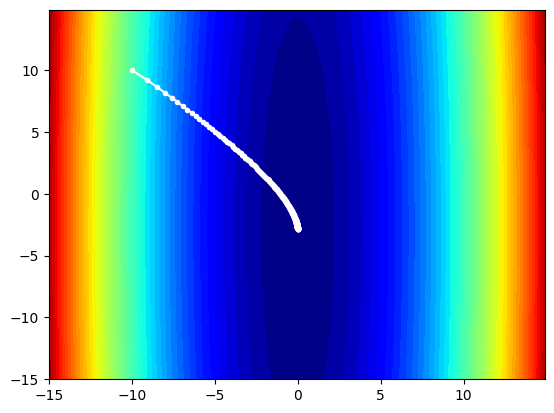

In [41]:
# Figure 3
# create a filled contour plot with 50 levels and jet color scheme
figure_3 = pyplot.figure(3)
pyplot.contourf(x, y, objective(x, y), levels=50, cmap='jet')
# plot the sample as black circles
pyplot.plot(solutions[:, 0], solutions[:, 1], '.-', color='w')
# show the plot
pyplot.show()

#Part d: Adam

##d.1. Set Parameters
You may change the following parameters.

In [ ]:
eps=1e-8
# define the total iterations
n_iter = 200
# steps size
gamma_t = 0.2
# factor for average gradient
alpha = 0.8
# factor for average squared gradient
beta = 0.999

##d.2. Adam Function
Modify the following function to implement the Adam approach.

In [ ]:
def adam(objective, derivative, bounds, n_iter, gamma_t, alpha, beta, eps):
	solutions = list()
	# consider an initial point
	p = [-10, 10]
	score = objective(p[0], p[1])
	# initialize first and second moments
	m = [0.0 for _ in range(bounds.shape[0])]
	D = [0.0 for _ in range(bounds.shape[0])]
	# run the Adam updates
	for t in range(n_iter):
		#<<TODO#5>> Add your code here
		# report progress
		print('>%d f(%s) = %.5f' % (t, p, score))
	return solutions

##d.3. Solve the Problem using Adam
Use the following block to solve the problem. Please do not modify it. 

In [ ]:
# perform the Adam search
solutions = adam(objective, gradient, bounds, n_iter, gamma_t, alpha, beta, eps)
solutions = asarray(solutions)

## d.4. Plot results for Adam
Use the following block to plot the results. Please do not modify it.

In [ ]:
# Figure 4
# create a filled contour plot with 50 levels and jet color scheme
figure_4 = pyplot.figure(4)
pyplot.contourf(x, y, objective(x, y), levels=50, cmap='jet')
# plot the solution
pyplot.plot(solutions[:, 0], solutions[:, 1], '.-', color='w')
# show the plot
pyplot.show()